In [230]:
from collections import defaultdict
import pandas as pd
import numpy as np
import scipy
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt
import surprise as sp
import time
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [231]:
#Importing the CSVs to Dataframe format
UsersDF = pd.read_csv('../raw_data/users_cleaned.csv')
AnimesDF = pd.read_csv('../raw_data/anime_cleaned.csv')
ScoresDF = pd.read_csv('../raw_data/animelists_cleaned.csv')

In [232]:
# Preprocessing
AnimesDF = AnimesDF.dropna(subset=['genre'])
AnimesDF['genre'] = AnimesDF['genre'].str.split(', ')

In [233]:
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(AnimesDF['genre'])
genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_, index=AnimesDF.index)
AnimesDF = pd.concat([AnimesDF, genre_df], axis=1)

# Select and scale features
selected_columns = ['score', 'episodes', 'members', 'duration_min'] + list(mlb.classes_)
anime_df_selected = AnimesDF[selected_columns].dropna()
scaler = StandardScaler().set_output(transform = "pandas")
anime_df_scaled = scaler.fit_transform(anime_df_selected)

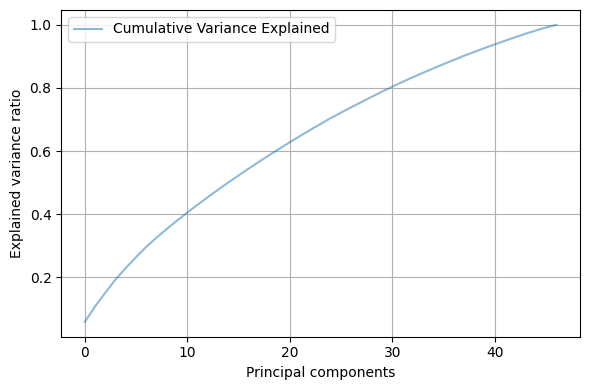

In [242]:
# Apply PCA
pca = PCA().set_output(transform = "pandas")
features_pca = pca.fit_transform(anime_df_scaled)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(6, 4))
plt.plot(range(len(explained_variance)), np.cumsum(explained_variance), alpha=0.5, label='Cumulative Variance Explained')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.grid()
plt.tight_layout()

# Use PCA to reduce dimensionality to 
pca = PCA(n_components=10)
features_pca = pca.fit_transform(anime_df_scaled)

In [243]:
# SCALING AND PRESERVING COLUMNS'NAMES
scaler = StandardScaler().set_output(transform = "pandas")
anime_df_scaled = scaler.fit_transform(anime_df_selected)
display(anime_df_scaled)

# PCA'ING AND PRESERVING COLUMNS'NAMES
threhsold_pca = 30
pca = PCA(n_components=threhsold_pca, whiten=True).set_output(transform="pandas") # find all the Principal Components PC (no y!)
pca.fit(anime_df_scaled)
features_pca = pca.transform(anime_df_scaled)
display(features_pca)
features_pca = pca.transform(anime_df_scaled)

,score,episodes,members,duration_min,Action,Adventure,Cars,Comedy,Dementia,Demons,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,0.841724,-0.055832,2.248116,-0.175806,-0.666793,-0.5052,-0.07868,1.098131,-0.084279,-0.18607,...,-0.091225,-0.401974,-0.196193,-0.23115,-0.241416,2.597852,-0.109531,-0.123429,-0.064957,-0.038767
1,1.122227,0.286342,1.488368,-0.175806,-0.666793,-0.5052,-0.07868,1.098131,-0.084279,-0.18607,...,-0.091225,-0.401974,-0.196193,-0.23115,-0.241416,-0.384933,-0.109531,-0.123429,-0.064957,-0.038767
2,0.755415,0.897367,0.215043,-0.175806,-0.666793,-0.5052,-0.07868,1.098131,-0.084279,-0.18607,...,-0.091225,-0.401974,-0.196193,-0.23115,-0.241416,-0.384933,-0.109531,-0.123429,-0.064957,-0.038767
3,1.467462,0.579634,0.435561,-0.491233,-0.666793,-0.5052,-0.07868,1.098131,-0.084279,-0.18607,...,-0.091225,-0.401974,-0.196193,-0.23115,-0.241416,-0.384933,-0.109531,-0.123429,-0.064957,-0.038767
4,1.963737,0.261901,1.286369,-0.175806,-0.666793,-0.5052,-0.07868,1.098131,-0.084279,-0.18607,...,-0.091225,-0.401974,-0.196193,-0.23115,-0.241416,-0.384933,-0.109531,-0.123429,-0.064957,-0.038767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6663,2.880767,-0.349124,-0.448555,0.060763,-0.666793,-0.5052,-0.07868,-0.910638,-0.084279,-0.18607,...,-0.091225,-0.401974,-0.196193,-0.23115,-0.241416,-0.384933,-0.109531,-0.123429,-0.064957,-0.038767
6664,-7.389971,-0.324683,-0.448298,-1.122085,-0.666793,-0.5052,-0.07868,-0.910638,-0.084279,-0.18607,...,-0.091225,2.487726,-0.196193,-0.23115,-0.241416,-0.384933,-0.109531,-0.123429,-0.064957,-0.038767
6665,-2.858763,-0.324683,-0.451599,0.257905,-0.666793,-0.5052,-0.07868,-0.910638,-0.084279,-0.18607,...,-0.091225,-0.401974,-0.196193,-0.23115,-0.241416,-0.384933,-0.109531,-0.123429,-0.064957,-0.038767
6666,-2.459585,-0.349124,-0.451484,-1.043229,-0.666793,-0.5052,-0.07868,-0.910638,-0.084279,-0.18607,...,-0.091225,-0.401974,-0.196193,-0.23115,-0.241416,-0.384933,-0.109531,-0.123429,-0.064957,-0.038767


,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,...,pca20,pca21,pca22,pca23,pca24,pca25,pca26,pca27,pca28,pca29
0,-0.063787,1.643491,-0.163774,-0.722921,0.517309,-0.155685,0.252328,-0.135382,0.801334,-0.075978,...,-0.261294,0.298131,0.294810,0.686771,-0.905429,-0.139745,0.161972,0.904884,-0.645954,-0.790322
1,-0.809201,1.037489,-0.471934,-1.795849,1.322379,0.190420,0.183704,1.059291,0.409713,0.142396,...,-1.075132,0.035348,-0.277490,1.635942,1.378164,0.407611,0.515899,-0.568468,1.375102,-1.170407
2,-1.068978,0.834850,-0.011675,-0.729150,-1.395208,0.129388,1.095894,-0.013680,0.177232,1.177620,...,0.053614,-0.558130,-0.546510,-0.940130,0.918384,-0.510441,-1.552753,-0.428322,0.534857,1.685816
3,-0.271879,1.215305,0.204009,-0.741943,-1.978573,0.405460,0.858599,0.230713,-0.318850,-0.210308,...,0.268801,-0.154760,0.372174,-1.233912,-0.499178,-0.117535,1.178699,-0.415255,-0.312112,-0.521948
4,0.048912,1.180127,-0.640278,-1.175212,-0.009196,1.118911,0.581648,-0.199399,0.176031,-0.147538,...,-0.334207,0.348865,0.362358,-0.122090,-0.423990,0.372098,0.909909,0.413078,-0.591511,-0.416554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6663,-0.240476,-0.268063,-0.276306,0.800717,-0.044828,0.403435,-0.409896,-1.847455,-0.910576,0.384444,...,-1.300896,-0.122978,-1.584919,0.331998,-0.366854,0.390088,0.331713,-0.386068,0.718726,0.566365
6664,-1.830017,-1.489242,-0.677706,0.968909,-0.792344,-0.460299,-0.850571,0.298898,0.100409,0.021816,...,1.583546,-0.763544,1.315152,-1.331959,0.399988,0.788314,0.700934,0.819916,-1.476392,-2.521448
6665,-1.169663,-1.757676,0.421504,1.310248,-0.646413,-0.447882,0.256577,0.128208,-0.019511,0.583291,...,-1.426989,0.715998,0.705326,2.512523,-0.237443,-1.285765,0.318352,-0.920003,0.280312,0.787540
6666,-1.077397,-1.458716,0.728362,1.107665,-0.163464,-0.660662,0.191756,0.592352,-0.034384,-0.338754,...,-0.809640,-1.130368,0.305722,1.064085,0.486092,-1.535367,-0.496749,-0.319155,-0.778510,0.187540


In [244]:
# Initialize an empty DataFrame to store the results
results = pd.DataFrame(columns=['k', 'Silhouette Score', 'Calinski Harabasz Score', 'Davies Bouldin Score'])

# Loop over the range of k values
for k in range(2, 11):  # we start from 2 because silhouette_score is not defined for a single cluster
    kmeans = KMeans(n_clusters=k, random_state=0, n_init = 'auto')
    clusters = kmeans.fit_predict(features_pca)

    silhouette = silhouette_score(features_pca, clusters)
    calinski_harabasz = calinski_harabasz_score(features_pca, clusters)
    davies_bouldin = davies_bouldin_score(features_pca, clusters)

    results = results.append({'k': k, 'Silhouette Score': silhouette, 'Calinski Harabasz Score': calinski_harabasz, 'Davies Bouldin Score': davies_bouldin}, ignore_index=True)

# Display the results
print(results)


/var/folders/8b/mfpwpgc50qzd5q81s_p1v5_h0000gn/T/ipykernel_61063/4039107383.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/8b/mfpwpgc50qzd5q81s_p1v5_h0000gn/T/ipykernel_61063/4039107383.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/8b/mfpwpgc50qzd5q81s_p1v5_h0000gn/T/ipykernel_61063/4039107383.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/8b/mfpwpgc50qzd5q81s_p1v5_h0000gn/T/ipykernel_61063/4039107383.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/8b/mfpwpgc50qzd5q81s_p1v5_h0000gn/T/ipykernel_61063/4039107383.py:13: FutureWarning:

The frame.append method is de

      k  Silhouette Score  Calinski Harabasz Score  Davies Bouldin Score
0   2.0          0.249979               194.369320              1.475404
1   3.0          0.243386               200.209915              1.632901
2   4.0          0.074624               194.576828              3.278840
3   5.0          0.053608               192.621346              3.294060
4   6.0          0.051308               201.752659              3.107600
5   7.0          0.065670               203.483097              2.891362
6   8.0          0.120486               223.268453              2.420514
7   9.0          0.127314               229.240779              2.312482
8  10.0          0.129862               235.660011              2.250079


/var/folders/8b/mfpwpgc50qzd5q81s_p1v5_h0000gn/T/ipykernel_61063/4039107383.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [245]:
# Add clusters to the DataFrame
AnimesDF['cluster'] = clusters
# Check the number of animes in each cluster
print(AnimesDF['cluster'].value_counts())

5    2995
6    1532
1     418
3     387
9     373
4     316
8     256
2     162
0     146
7      79
Name: cluster, dtype: int64


In [246]:
# Check the mean values of the features in each cluster
print(AnimesDF.groupby('cluster')[['episodes', 'score', 'members', 'duration_min']].mean())

          episodes     score        members  duration_min
cluster                                                  
0        10.849315  7.160616   31177.801370     47.372603
1        14.555024  7.129378   63646.275120     32.794258
2        24.012346  6.812284   65688.191358     25.596914
3        12.330749  7.152687   52245.705426     41.072351
4         8.667722  6.564968   24163.129747     19.463608
5        11.968614  6.774551   44400.732220     24.586834
6        16.195170  7.007892   55849.767624     33.656125
7        11.645570  7.489241  173143.189873     37.582278
8        14.253906  6.703477   44641.296875     17.582292
9        29.211796  6.278097    8998.490617     27.250938


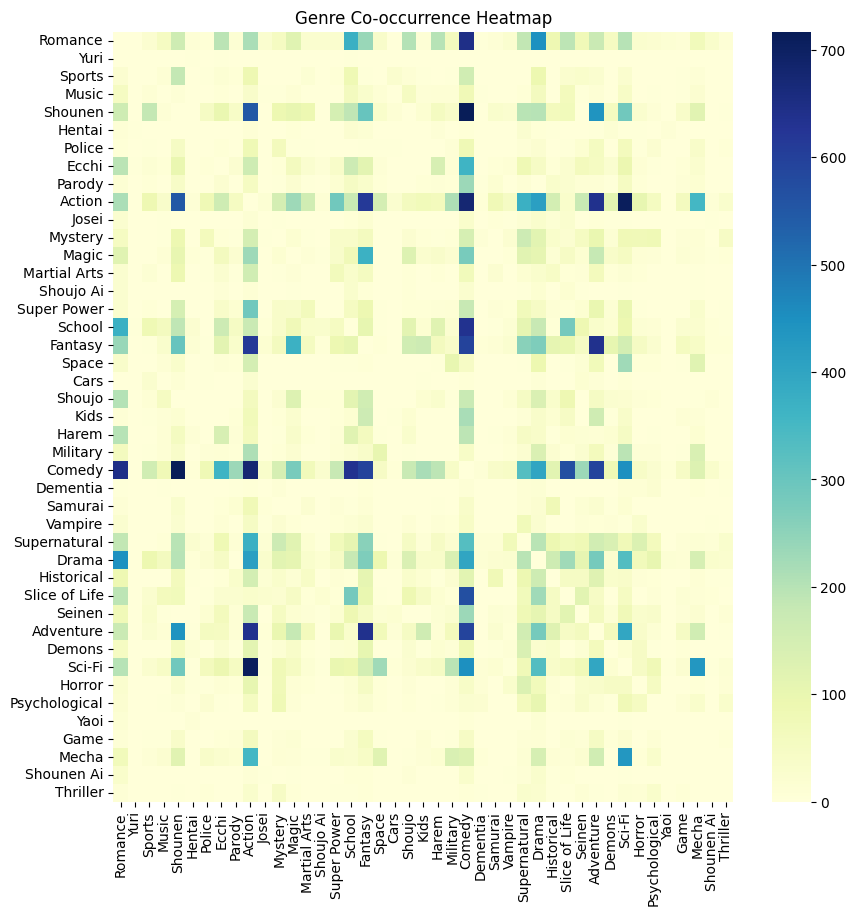

In [247]:
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

# Create a list of all genres
all_genres = list(set(itertools.chain.from_iterable(GenreDF)))

# Initialize a co-occurrence matrix of zeros
co_occurrence_matrix = pd.DataFrame(np.zeros((len(all_genres), len(all_genres))), index=all_genres, columns=all_genres)

# Iterate through each list of genres and increment co-occurrence matrix for each pair
for genres in GenreDF:
    for genre1, genre2 in itertools.combinations(genres, 2):
        co_occurrence_matrix.loc[genre1, genre2] += 1
        co_occurrence_matrix.loc[genre2, genre1] += 1

# Plot the co-occurrence matrix as a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(co_occurrence_matrix, cmap='YlGnBu')
plt.title('Genre Co-occurrence Heatmap')
plt.show()


In [ ]:
# Apply Elbow method
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(features_pca)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [248]:
AnimesDF

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri,cluster
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,0,0,0,0,1,0,0,0,0,5
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,0,0,0,0,0,0,0,0,0,8
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,0,0,0,0,0,0,0,0,0,5
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,0,0,0,0,0,0,0,0,0,5
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6663,37405,Dokidoki Little Ooyasan,NaN,dokidokiりとる大家さん,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Other,0,Currently Airing,...,0,0,0,0,0,0,0,0,0,5
6664,37886,Wo Shi Jiang Xiaobai (2018),I&#039;m Joybo OVA,我是江小白 小剧场,Wo Shi Jiang Xiao Bai: Xiao Ju Chang,https://myanimelist.cdn-dena.com/images/anime/...,ONA,Original,1,Finished Airing,...,1,0,0,0,0,0,0,0,0,5
6665,37255,Genki Genki Non-tan: Obake Mura Meiro,NaN,げんきげんきノンタン おばけむらめいろ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Original,1,Finished Airing,...,0,0,0,0,0,0,0,0,0,4
6666,35229,Mr. Men Little Miss,Mr. Men Little Miss,Mr. Men Little Miss / ミスターメン リトルミス,NaN,https://myanimelist.cdn-dena.com/images/anime/...,ONA,Picture book,0,Currently Airing,...,0,0,0,0,0,0,0,0,0,9
